In [2]:
import numpy as np
from scipy.ndimage import zoom
import torch
import matplotlib.pyplot as plt
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (10, 8)

from subtle.utils.io import load_file

from smreg.load_model import load_reg_model
from smreg.pl_module import RegistrationModule
from smreg.predict import predict

/home/srivathsa/projects/SubtleGad/train/subtle/utils/hyperparameter.py:8: UserWarning: Module test_tube not found - hyperparameter related functions cannot be used
  warnings.warn('Module test_tube not found - hyperparameter related functions cannot be used')
/home/srivathsa/miniconda3/envs/synthmorph/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SSIM` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

In [ ]:
model_path = '/home/yiheng/code/synthmorph_registration/logs/sm2d_09.08/version_0/checkpoints/best_reg_model.ckpt'
device = 'cuda:0'

reg_model = load_reg_model(model_path, device)
reg_model.eval()

data = load_file('/home/srivathsa/projects/studies/gad/radnet/preprocess/data/Rad1.h5')

pre = torch.from_numpy(zoom(data[:, 0], (1, 0.5, 0.5))[None, ..., None])
post = torch.from_numpy(zoom(data[:, 2], (1, 0.5, 0.5))[None, ..., None])

In [20]:
data = np.load('/home/srivathsa/projects/studies/gad/radnet/synthmorph/sm2d_09.08-subtlegad(version_0)/case_2.npz')

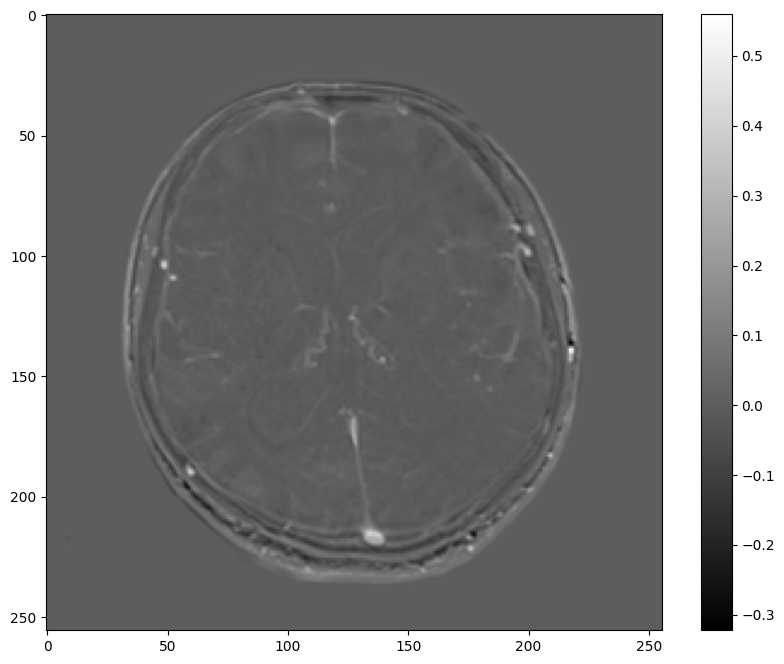

In [21]:
pre = data['target'][:, 0]
post = data['source'][:, 0]
post_reg = data['pred'][:, 0]

sl = 14

plt.imshow(post[sl] - pre[sl])
plt.colorbar()

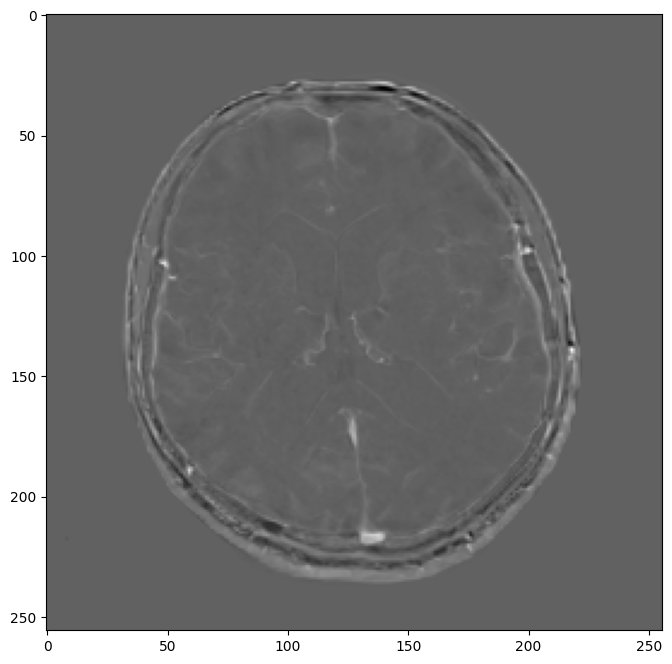

In [22]:
plt.imshow(post_reg[sl] - pre[sl])